In [2]:
"""A simple example notebook on how to load and explore data from the dwh_finance."""

'A simple example notebook on how to load and explore data from the dwh.'

# Exploring Financial Data

In [3]:
import seaborn as sns
from dotenv import load_dotenv

from IPython.display import display

from aif.common.aif.src.data_interfaces.db_interface import DBInterface
from aif.common.aif.src.initialization import initialize_aif

In [4]:
CONFIG_FILES = [
    "aif/common/aif/resources/config/base.yaml",
    "aif/ai_analytics/resources/config/{ENV}/dwh.yaml",
]

In [5]:
load_dotenv();

In [6]:
initialize_aif(config_files=CONFIG_FILES, show_licence_notice=False)

2024-06-12 11:51:52 | INFO     | aif.common.aif.src.initialization             | Loaded settings for environment dev:
{
    "environment": "dev",
    "path": "/home/christian/Workspace/AIF-Pro/",
    "version": "1.3.1",
    "common": {
        "default_db": "dwh"
    },
    "logging": {
        "log_aif_console_level": "debug",
        "log_aif_file_level": "debug",
        "log_aif_filename": "/log/logging_aif.log",
        "log_root_file_level": "info",
        "log_root_filename": "/log/logging_root.log"
    },
    "dwh": {
        "host": "127.0.0.1",
        "port": 5432,
        "user": "aif",
        "password": "--SECRET--",
        "db_name": "dwh"
    }
}


# Query Data from DWH

In [7]:
with DBInterface(db_cfg="DWH_FINANCE") as db:
    ohlc_df = db.execute_query(sql_stmt="SELECT * FROM core_fin_data_yf.ohlc_daily").result_df

2024-06-12 11:51:52 | DEBUG    | aif.common.aif.src.db_interface               | Connecting to default database: dwh
2024-06-12 11:51:52 | DEBUG    | aif.common.aif.src.db_interface               | Connection to database on 127.0.0.1:5432 established...
2024-06-12 11:51:52 | INFO     | aif.common.aif.src.db_interface               | Executing Statement:
SELECT * FROM core_fin_data_yf.ohlc_daily
2024-06-12 11:51:53 | DEBUG    | aif.common.aif.src.db_interface               | Result shape of dataframe: (10962, 7)
2024-06-12 11:51:53 | DEBUG    | aif.common.aif.src.db_interface               | Connection to database was closed.


# Inspect Data

In [8]:
display(ohlc_df)  # pylint: disable=undefined-variable

,asset_id,price_date,open,high,low,close,volume
0,AAPL,1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600.0
1,AAPL,1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800.0
2,AAPL,1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000.0
3,AAPL,1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600.0
4,AAPL,1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600.0
...,...,...,...,...,...,...,...
10957,AAPL,2024-05-31,191.440002,192.570007,189.910004,192.250000,75158300.0
10958,AAPL,2024-06-03,192.899994,194.990005,192.520004,194.029999,50080500.0
10959,AAPL,2024-06-04,194.639999,195.320007,193.029999,194.350006,47471400.0
10960,AAPL,2024-06-05,195.399994,196.899994,194.869995,195.869995,54156800.0


# Visualize and Explore Data

In [10]:
ohlc_df["hl_diff"] = ohlc_df["high"] - ohlc_df["low"]

In [11]:
ohlc_df["hl_diff_y"] = ohlc_df["hl_diff"].shift(1)

<Axes: xlabel='hl_diff_y', ylabel='hl_diff'>

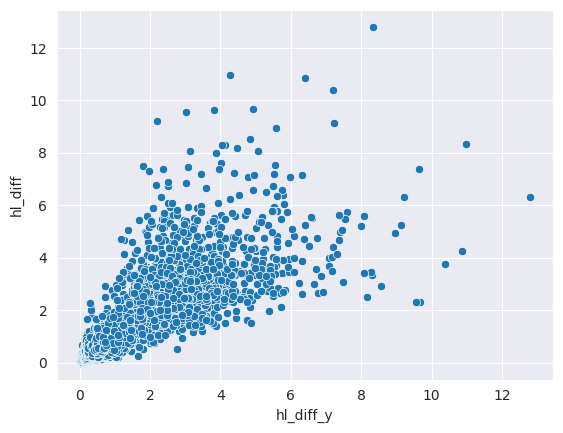

In [13]:
sns.scatterplot(x="hl_diff_y", y="hl_diff", data=ohlc_df)